# Pipeline на датасете Online Shoppers Purchasing Intention Dataset

Из 12 330 сессий в наборе данных 84,5% (10 422) являются примерами негативного класса, которые не завершились покупкой, а остальные (1908) — примерами позитивного класса, завершившегося покупкой.

Ссылка на датасет:
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

## Импорт библиотек и загрузка данных

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

df = X.copy()
df['Revenue'] = y

# metadata
online_shoppers_purchasing_intention_dataset.metadata

{'uci_id': 468,
 'name': 'Online Shoppers Purchasing Intention Dataset',
 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv',
 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.',
 'area': 'Business',
 'tasks': ['Classification', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 12330,
 'num_features': 17,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Revenue'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Thu Jan 11 2024',
 'dataset_doi': '10.24432/C5F88Q',
 'creators': ['C. Sakar', 'Yomi Kastro'],
 'intro_paper': {'ID': 367,
  'type': 'NATIVE',
  'title': 'Real-time prediction

In [ ]:
# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

У нас 2 категориальных столбца. Пропусков нет. Предсказываем мы Revenue - была ли совершена покупка.

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Описание данных

* `Administrative` - количество посещённых административных страниц
* `Administrative_Duration` - время (в секундах), проведённое на административных страницах
* `Informational` - количество посещённых информационных страниц
* `Informational_Duration` - время (в секундах), проведённое на информационных страницах
* `ProductRelated` - количество посещённых страниц, связанных с продуктами
* `ProductRelated_Duration` - время (в секундах), проведённое на страницах продуктов
* `BounceRates` - процент посетителей, которые покинули сайт после просмотра одной страницы
* `ExitRates` - процент сеансов, завершившихся после просмотра конкретной страницы
* `PageValues` - средняя ценность страницы для завершения транзакции
* `SpecialDay` - близость даты посещения к особому празднику (например, День святого Валентина)
* `Month` - месяц посещения сайта
* `OperatingSystems` - операционная система посетителя
* `Browser` - браузер посетителя
* `Region` - географический регион посетителя
* `TrafficType` - источник трафика (тип перехода на сайт)
* `VisitorType` - тип посетителя (новый или возвращающийся)
* `Weekend` - был ли визит совершён в выходной день
* `Revenue` - целевая переменная: была ли совершена покупка

In [ ]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
df.sample(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5061,0,0.0,0,0.0,14,310.000000,0.028571,0.064286,0.0,0.2,May,2,4,1,3,Returning_Visitor,False,False
10600,0,0.0,0,0.0,9,214.750000,0.000000,0.022222,0.0,0.0,Nov,1,1,3,6,Returning_Visitor,False,False
3868,0,0.0,0,0.0,50,1735.595238,0.000000,0.008746,0.0,0.2,May,2,2,3,1,Returning_Visitor,False,False


## Исследование данных

Размер датасета

In [ ]:
df.shape

(12330, 18)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Основные числовые характеристики

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


Месяц имеет 10 уникальных значений, ТипПосетителя - 3.

In [ ]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

np.int64(125)

In [ ]:
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [ ]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(12205, 18)

In [ ]:
df.reset_index(inplace=True, drop=True)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Анализ

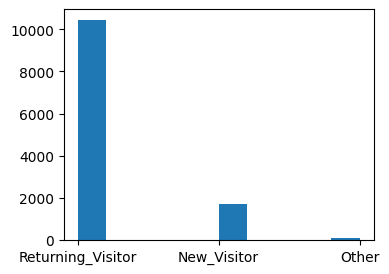

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.VisitorType);

Больше всего в датасете встречаются повторные посещения.

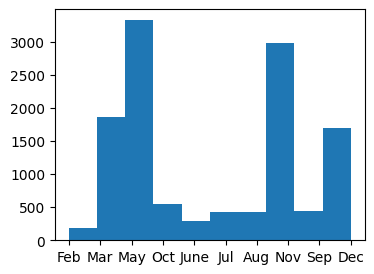

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.Month);

Чаще всего встречаются май и ноябрь.

### Распределение целевой переменной (Revenue)

In [ ]:
df['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
False,0.843671
True,0.156329


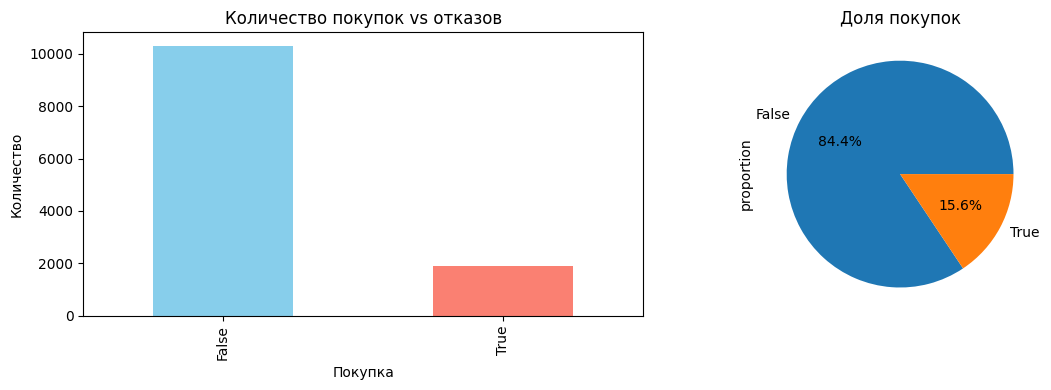

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['Revenue'].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Количество покупок vs отказов')
axes[0].set_xlabel('Покупка')
axes[0].set_ylabel('Количество')

df['Revenue'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Доля покупок')
plt.tight_layout()
plt.show()

In [ ]:
print("=== Средние значения по группам ===")
behavior_comparison = df.groupby('Revenue').agg({
    'ProductRelated_Duration': 'mean',
    'PageValues': 'mean',
    'ProductRelated': 'mean',
    'BounceRates': 'mean',
    'ExitRates': 'mean'
}).round(2)

behavior_comparison

=== Средние значения по группам ===


,ProductRelated_Duration,PageValues,ProductRelated,BounceRates,ExitRates
Revenue,,,,,
False,1082.98,2.00,29.05,0.02,0.05
True,1876.21,27.26,48.21,0.01,0.02


In [ ]:
# 1. Анализ по месяцам

monthly_conversion = df.groupby('Month').agg({
    'Revenue': ['count', 'sum', lambda x: (x.sum() / len(x) * 100).round(2)]
})
monthly_conversion.columns = ['Всего_сессий', 'Покупок', 'Конверсия_%']
monthly_conversion.sort_values('Конверсия_%', ascending=False)

=== Конверсия по месяцам ===


,Всего_сессий,Покупок,Конверсия_%
Month,,,
Nov,2982,760,25.49
Oct,549,115,20.95
Sep,448,86,19.20
Aug,433,76,17.55
Jul,432,66,15.28
Dec,1706,216,12.66
May,3329,365,10.96
Mar,1860,192,10.32
June,285,29,10.18


### Анализ временных и категориальных факторов

In [ ]:
# Анализ по месяцам
monthly_conversion = df.groupby('Month').agg({
    'Revenue': ['count', 'sum', lambda x: (x.sum() / len(x) * 100).round(2)]
})
monthly_conversion.columns = ['Всего_сессий', 'Покупок', 'Конверсия_%']
monthly_conversion.sort_values('Конверсия_%', ascending=False)

,Всего_сессий,Покупок,Конверсия_%
Month,,,
Nov,2982,760,25.49
Oct,549,115,20.95
Sep,448,86,19.20
Aug,433,76,17.55
Jul,432,66,15.28
Dec,1706,216,12.66
May,3329,365,10.96
Mar,1860,192,10.32
June,285,29,10.18


In [ ]:
# Анализ по типу посетителя
visitor_conversion = df.groupby('VisitorType').agg({
    'Revenue': ['count', 'sum', lambda x: (x.sum() / len(x) * 100).round(2)],
    'PageValues': 'mean'
})
visitor_conversion.columns = ['Всего_сессий', 'Покупок', 'Конверсия_%', 'Ср_ценность_страниц']
visitor_conversion

,Всего_сессий,Покупок,Конверсия_%,Ср_ценность_страниц
VisitorType,,,,
New_Visitor,1693,422,24.93,10.778550
Other,81,16,19.75,19.090173
Returning_Visitor,10431,1470,14.09,5.063768


In [ ]:
# Влияние выходных дней
weekend_conversion = df.groupby('Weekend').agg({
    'Revenue': ['count', 'sum', lambda x: (x.sum() / len(x) * 100).round(2)],
    'ProductRelated_Duration': 'mean'
})
weekend_conversion.columns = ['Всего_сессий', 'Покупок', 'Конверсия_%', 'Ср_время_на_продуктах']
weekend_conversion

,Всего_сессий,Покупок,Конверсия_%,Ср_время_на_продуктах
Weekend,,,,
False,9346,1409,15.08,1201.777530
True,2859,499,17.45,1223.997236


/tmp/ipython-input-793640924.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  specialday_plot = df.groupby('SpecialDay_Category')['Revenue'].mean() * 100


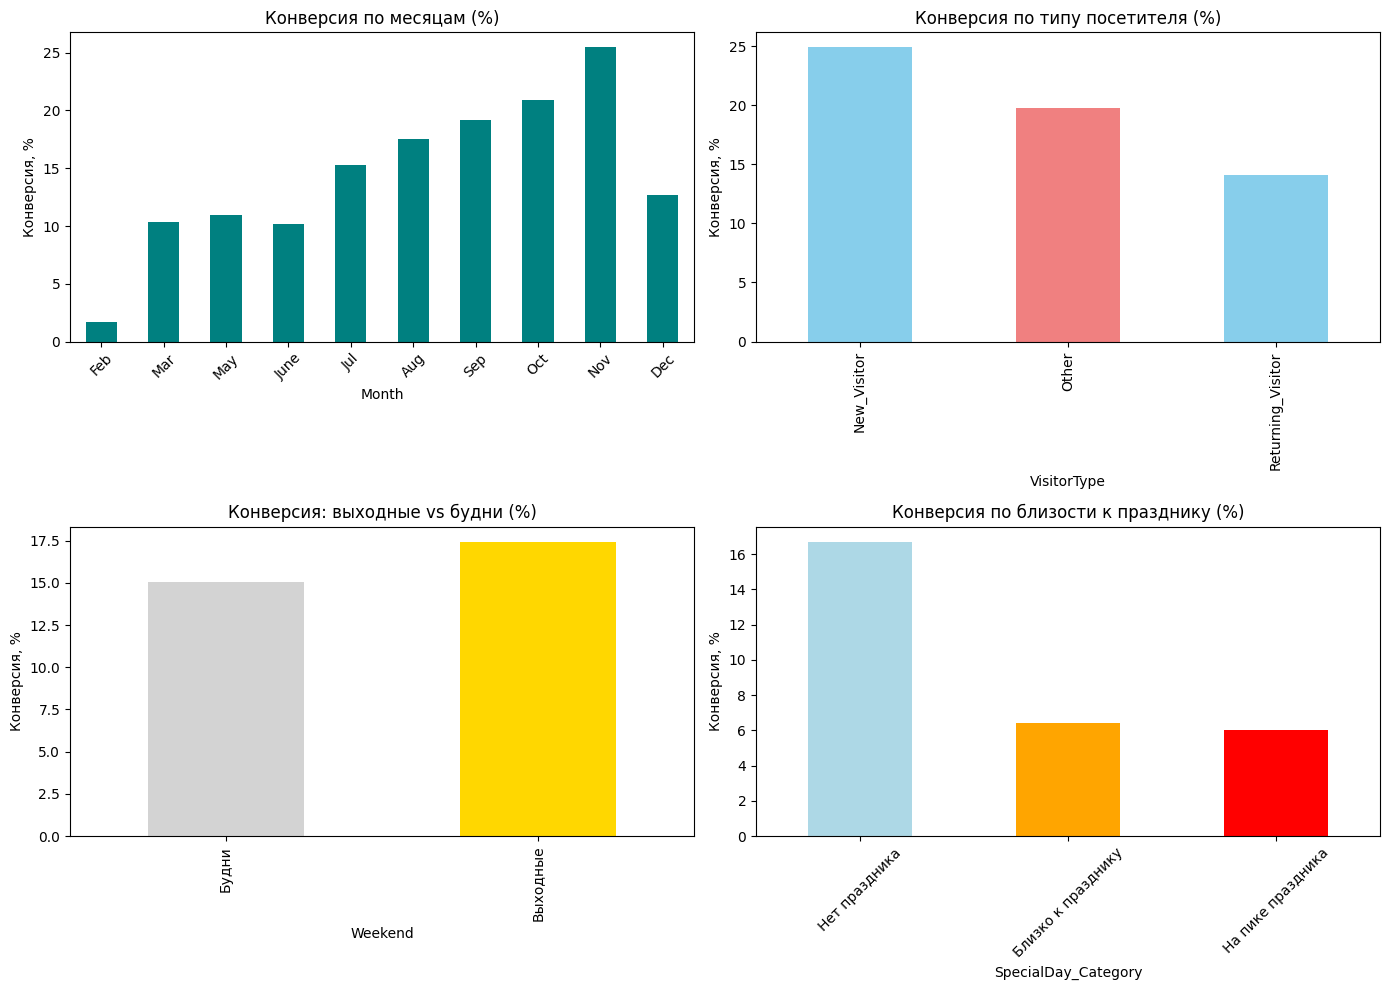

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Конверсия по месяцам
month_order = ['Feb', 'Mar', 'May', 'June',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_plot = df.groupby('Month')['Revenue'].mean().reindex(month_order) * 100
monthly_plot.plot(kind='bar', ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Конверсия по месяцам (%)')
axes[0, 0].set_ylabel('Конверсия, %')
axes[0, 0].tick_params(axis='x', rotation=45)

# Конверсия по типу посетителя
visitor_plot = df.groupby('VisitorType')['Revenue'].mean() * 100
visitor_plot.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Конверсия по типу посетителя (%)')
axes[0, 1].set_ylabel('Конверсия, %')

# Конверсия в выходные
weekend_plot = df.groupby('Weekend')['Revenue'].mean() * 100
weekend_plot.plot(kind='bar', ax=axes[1, 0], color=['lightgray', 'gold'])
axes[1, 0].set_title('Конверсия: выходные vs будни (%)')
axes[1, 0].set_xticklabels(['Будни', 'Выходные'])
axes[1, 0].set_ylabel('Конверсия, %')

# Влияние SpecialDay
df['SpecialDay_Category'] = pd.cut(df['SpecialDay'],
                                    bins=[-0.1, 0, 0.5, 1],
                                    labels=['Нет праздника', 'Близко к празднику', 'На пике праздника'])
specialday_plot = df.groupby('SpecialDay_Category')['Revenue'].mean() * 100
specialday_plot.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'orange', 'red'])
axes[1, 1].set_title('Конверсия по близости к празднику (%)')
axes[1, 1].set_ylabel('Конверсия, %')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Преобразование категориальных данных в числовые

Используем LabelEncoder для Month (так как месяцы имеют естественный порядок)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

correct_month_order = ['Feb', 'Mar', 'May', 'June', 'Jul',
                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_mapping = {month: idx for idx, month in enumerate(correct_month_order)}

df['Month_encoded'] = df['Month'].map(month_mapping)
print("Месяцы закодированы:")
for month, code in month_mapping.items():
    print(f"  {month}: {code}")

Месяцы закодированы:
  Feb: 0
  Mar: 1
  May: 2
  June: 3
  Jul: 4
  Aug: 5
  Sep: 6
  Oct: 7
  Nov: 8
  Dec: 9


One-Hot Encoding для VisitorType (так как это номинальная категория).

---

Чтобы не было сильной мультиколлинеарности удаляем один из типов посетителя, а именно NewVisitor.

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
visitor_encoded = onehot_encoder.fit_transform(df[['VisitorType']])

# Создаем DataFrame с закодированными колонками
visitor_encoded_df = pd.DataFrame(
    visitor_encoded,
    columns=onehot_encoder.get_feature_names_out(['VisitorType'])
)

# Удаляем исходные колонки и добавляем закодированные
df = df.drop(['Month', 'VisitorType'], axis=1)
df = pd.concat([df, visitor_encoded_df], axis=1)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_encoded,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,0.0,1.0


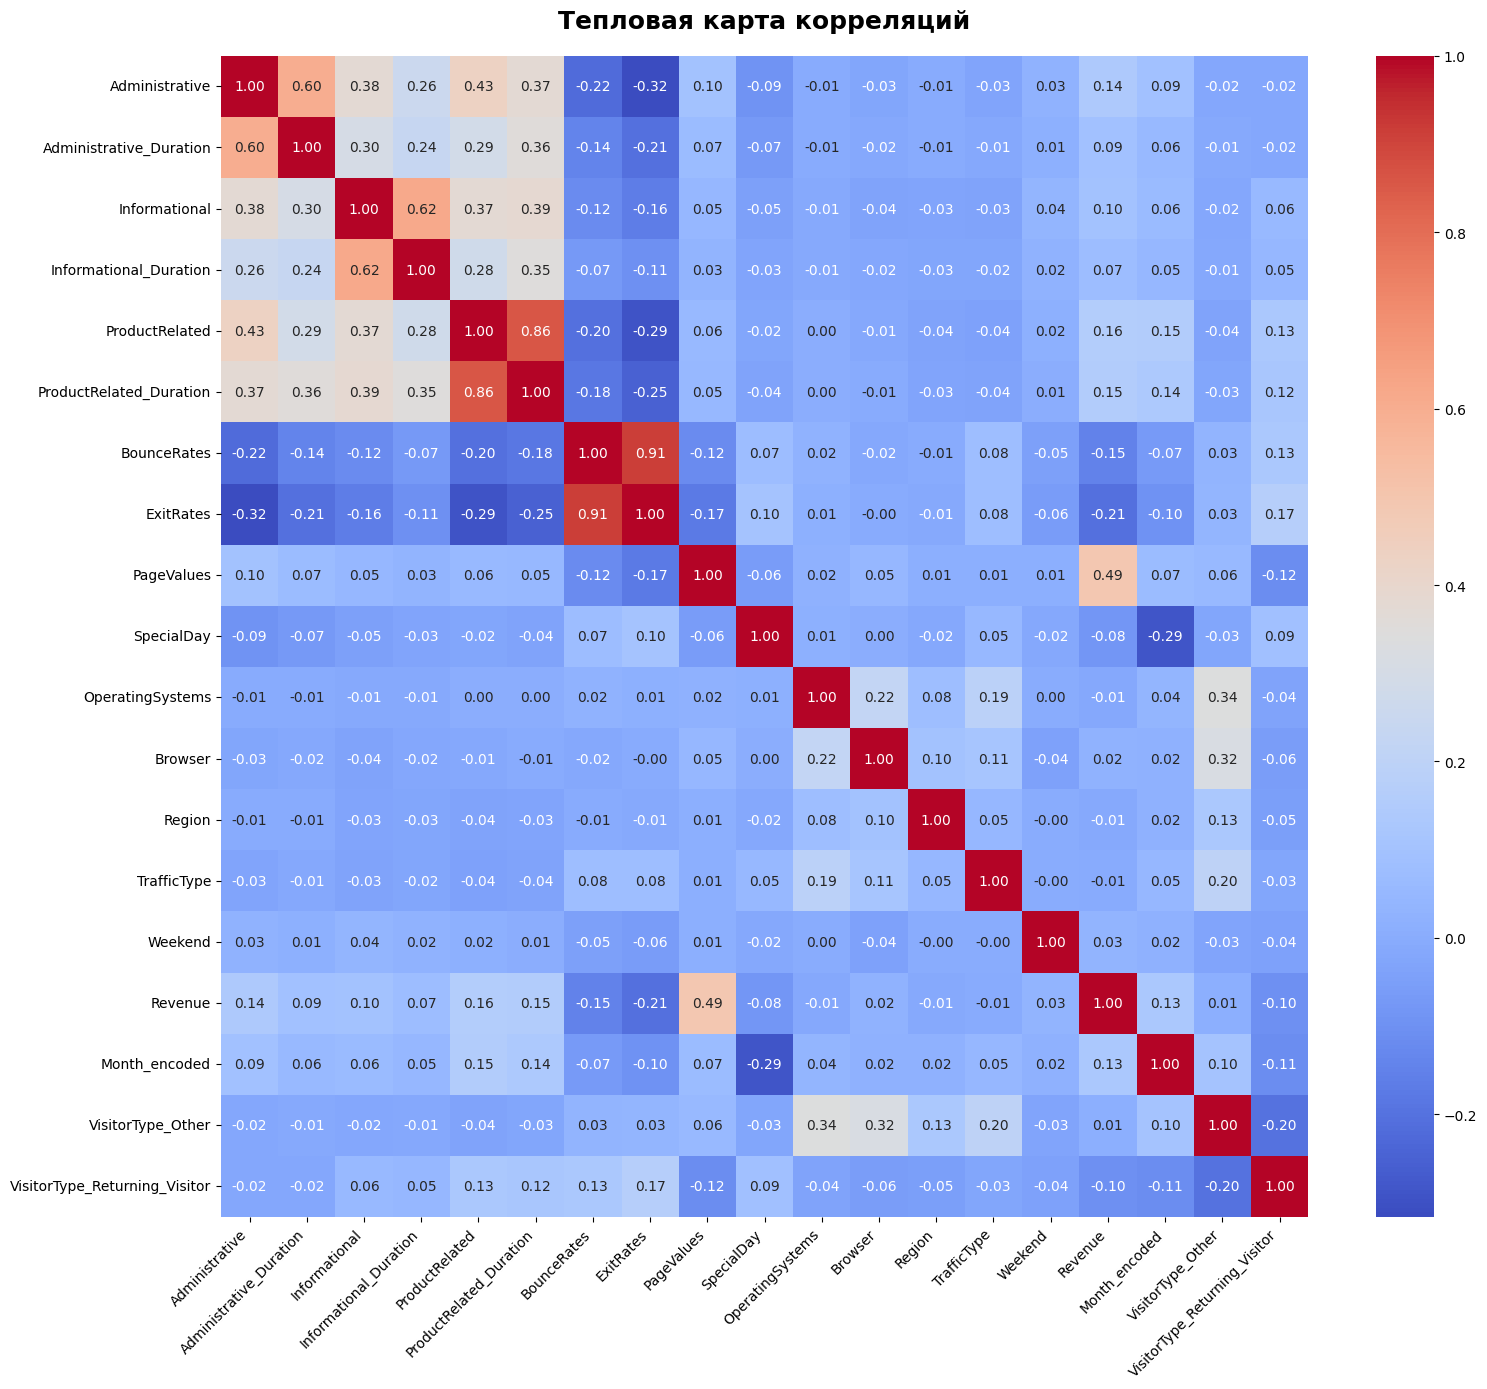

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 14), dpi=100)

corr_matrix = df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)

plt.title('Тепловая карта корреляций', fontsize=18, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=42)
rndForest.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
8,PageValues,0.431648
5,ProductRelated_Duration,0.083591
7,ExitRates,0.074430
6,BounceRates,0.068839
4,ProductRelated,0.064826
1,Administrative_Duration,0.057427
15,Month_encoded,0.043985
0,Administrative,0.036479
13,TrafficType,0.026635
12,Region,0.026370


In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=42)

for name, imp in sorted(zip(X.columns, res.importances_mean),
                        key=lambda x: x[1], reverse=True):
    print(f"{name}: {imp:.4f}")

PageValues: 1.1381
Month_encoded: 0.2622
ProductRelated_Duration: 0.1961
BounceRates: 0.1897
ExitRates: 0.1894
ProductRelated: 0.1879
Administrative: 0.1448
Administrative_Duration: 0.1346
TrafficType: 0.0488
Region: 0.0429
Informational_Duration: 0.0339
Informational: 0.0240
Browser: 0.0233
VisitorType_Returning_Visitor: 0.0218
OperatingSystems: 0.0203
Weekend: 0.0197
SpecialDay: 0.0022
VisitorType_Other: 0.0006


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=42)
gradBoost.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
8,PageValues,0.769325
15,Month_encoded,0.055788
6,BounceRates,0.046375
0,Administrative,0.026036
5,ProductRelated_Duration,0.024531
7,ExitRates,0.022108
4,ProductRelated,0.021222
1,Administrative_Duration,0.010154
17,VisitorType_Returning_Visitor,0.009846
13,TrafficType,0.005073


In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=42)

for name, imp in sorted(zip(X.columns, res.importances_mean),
                        key=lambda x: x[1], reverse=True):
    print(f"{name}: {imp:.4f}")

PageValues: 0.8601
Month_encoded: 0.0503
ProductRelated_Duration: 0.0304
ExitRates: 0.0257
BounceRates: 0.0217
Administrative: 0.0175
ProductRelated: 0.0132
Administrative_Duration: 0.0090
VisitorType_Returning_Visitor: 0.0066
TrafficType: 0.0062
Informational_Duration: 0.0039
Informational: 0.0028
Region: 0.0018
Browser: 0.0014
OperatingSystems: 0.0011
Weekend: 0.0003
VisitorType_Other: 0.0001
SpecialDay: 0.0000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linReg = LinearRegression()
linReg.fit(X_scaled, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': linReg.coef_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
8,PageValues,0.166316
6,BounceRates,0.023985
15,Month_encoded,0.023516
5,ProductRelated_Duration,0.019590
4,ProductRelated,0.015786
0,Administrative,0.005753
11,Browser,0.005467
14,Weekend,0.004681
2,Informational,0.004106
3,Informational_Duration,0.001493


In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(linReg, X, y, n_repeats=10, n_jobs=-1, random_state=42)

for name, imp in sorted(zip(X.columns, res.importances_mean),
                        key=lambda x: x[1], reverse=True):
    print(f"{name}: {imp:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Administrative_Duration: 115.7357
VisitorType_Returning_Visitor: 0.3560
BounceRates: 0.1315
TrafficType: 0.1189
Browser: 0.0395
OperatingSystems: 0.0125
VisitorType_Other: -0.0110
Weekend: -0.0111
SpecialDay: -0.0327
Region: -0.2352
ExitRates: -0.3747
Informational: -1.1813
Administrative: -4.1914
Month_encoded: -6.1199
Informational_Duration: -42.3161
PageValues: -86.4557
ProductRelated_Duration: -344.7318
ProductRelated: -346.6544


Обучение моделей

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_encoded,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,9,0.0,1.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,8,0.0,1.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,8,0.0,1.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,8,0.0,1.0


In [ ]:
y

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [ ]:
features_2 = ['PageValues', 'Month_encoded']
features_3 = ['PageValues', 'Month_encoded', 'ProductRelated_Duration']
features_all = ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay',	'OperatingSystems',	'Browser',	'Region', 'TrafficType',	'Weekend', 'Month_encoded', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [ ]:
def train_and_evaluate_model(model, features):
    X_train_f = X_train[features]
    X_test_f = X_test[features]

    if isinstance(model, LogisticRegression):
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train_f)
        X_test_sc = scaler.transform(X_test_f)
        cv = cross_val_score(model, X_train_sc, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='roc_auc')
        model.fit(X_train_sc, y_train)
        y_pred_test = model.predict(X_test_sc)
    else:
        cv = cross_val_score(model, X_train_f, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='roc_auc')
        model.fit(X_train_f, y_train)
        y_pred_test = model.predict(X_test_f)

    # Метрики классификации
    test_acc = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    return {
        'model': model,
        'cv_mean_roc_auc': cv.mean(),
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1
    }

In [ ]:
comparison_data = []
for (name, feats) in [('2 признака', features_2),
                      ('3 признака', features_3),
                      ('Все признаки', features_all)]:
    for model_name, model in models.items():
        result = train_and_evaluate_model(model, feats)
        comparison_data.append({
            'Признаки': name,
            'Модель': model_name,
            'CV ROC-AUC': f"{result['cv_mean_roc_auc']:.4f}",
            'Test Accuracy': f"{result['test_accuracy']:.4f}",
            'Test F1': f"{result['test_f1']:.4f}",
            'Test Precision': f"{result['test_precision']:.4f}",
            'Test Recall': f"{result['test_recall']:.4f}"
        })

comparison_df = pd.DataFrame(comparison_data)

In [ ]:
comparison_df

,Признаки,Модель,CV ROC-AUC,Test Accuracy,Test F1,Test Precision,Test Recall
0,2 признака,LogisticRegression,0.8822,0.8686,0.4564,0.7351,0.3309
1,2 признака,RandomForest,0.9123,0.8816,0.6237,0.6630,0.5888
2,2 признака,GradientBoosting,0.9178,0.8881,0.6506,0.6781,0.6253
3,3 признака,LogisticRegression,0.8953,0.8698,0.4641,0.7394,0.3382
4,3 признака,RandomForest,0.9210,0.8861,0.6278,0.6890,0.5766
5,3 признака,GradientBoosting,0.9231,0.8893,0.6431,0.6949,0.5985
6,Все признаки,LogisticRegression,0.8888,0.8690,0.4590,0.7366,0.3333
7,Все признаки,RandomForest,0.9276,0.8925,0.6209,0.7535,0.5280
8,Все признаки,GradientBoosting,0.9324,0.8938,0.6440,0.7292,0.5766
